<a href="https://colab.research.google.com/github/D-Anonymous/October-Internship-Report/blob/main/October_Batch_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Uploading a Google Sheet from Google Drive**

**Authenticate and Connect to Google Drive**

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate and create the PyDrive client
auth.authenticate_user()

# Connect to Google Sheets
gc = gspread.authorize(default()[0])

**Load Data from a Google Sheet**

In [ ]:
# Replace 'your_sheet_id' with your actual Google Sheet ID
sheet_id = '1dXuaQTnmPaIchJBTGKUwGBU3iIi3ZPEn1r4PWxF8V90'
sheet = gc.open_by_key(sheet_id)

# Select the first sheet (worksheet) in the Google Sheet
worksheet = sheet.get_worksheet(1)

# Convert the worksheet to a pandas DataFrame
import pandas as pd
data = pd.DataFrame(worksheet.get_all_records())

## **2. Data Cleaning**


**Overview of the Data**

In [ ]:
# Display the first few rows of the DataFrame
data.head(3)

,Student Name,Reg No,Class ID,Status,Time taken,Final Theory,Practical(A),Viva (B),Final Icare,Practical's taken by,Trainer,HighSchool Level,HighSchool Grade,Entry Scores,Average CATS,Average Handouts,Average Practicals,Average Attendance,Hospital Internship
0,Messy Nyatuka Getubo,23-1194,Batch 2 2024 Childcare_Nairobi,Pass,20 mins 26 secs,76,66,14,80,Deepali Ingawale,Emmaculate Kosgei,Highschool,C+,80,90,Null,93,86,Mother and Child Hospital
1,Miriam Syombua Mutisya,24-0523,Batch 2 2024 Childcare_Nairobi,Pass,29 mins 5 secs,80,72,16,88,Deepali Ingawale,Emmaculate Kosgei,Degree,C+,100,82,Null,93,Null,Jesse Kay Hospital
2,Phoebe Alice Nunga,24-0368,Batch 2 2024 Childcare_Nairobi,Pass,30 mins 36 secs,76,63,12,75,Sarika More,Emmaculate Kosgei,Highschool,D+,95,74,Null,89,Null,Mother and Child Hospital


In [ ]:
# Display summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Student Name          113 non-null    object
 1   Reg No                113 non-null    object
 2   Class ID              113 non-null    object
 3   Status                113 non-null    object
 4   Time taken            113 non-null    object
 5   Final Theory          113 non-null    int64 
 6   Practical(A)          113 non-null    int64 
 7   Viva (B)              113 non-null    int64 
 8   Final Icare           113 non-null    int64 
 9   Practical's taken by  113 non-null    object
 10  Trainer               113 non-null    object
 11  HighSchool Level      113 non-null    object
 12  HighSchool Grade      113 non-null    object
 13  Entry Scores          113 non-null    object
 14  Average CATS          113 non-null    object
 15  Average Handouts      113 non-null    ob

**Handling Missing Values**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Student Name            0
Reg No                  0
Class ID                0
Status                  0
Time taken              0
Final Theory            0
Practical(A)            0
Viva (B)                0
Final Icare             0
Practical's taken by    0
Trainer                 0
HighSchool Level        0
HighSchool Grade        0
Entry Scores            0
Average CATS            0
Average Handouts        0
Average Practicals      0
Average Attendance      0
Hospital Internship     0
dtype: int64


In [ ]:
# Check for empty values
empty_strings = (data == '').sum()
print("Empty strings in each column:\n", empty_strings)
data.replace('', np.nan, inplace=True)

Empty strings in each column:
 Student Name            0
Reg No                  0
Class ID                0
Status                  0
Time taken              0
Final Theory            0
Practical(A)            0
Viva (B)                0
Final Icare             0
Practical's taken by    0
Trainer                 0
HighSchool Level        0
HighSchool Grade        0
Entry Scores            0
Average CATS            0
Average Handouts        0
Average Practicals      0
Average Attendance      0
Hospital Internship     2
dtype: int64


**Standardize data formats**

In [ ]:
# Replace 'Null' or other non-numeric strings with NaN before type casting
data = data.replace('Null', np.nan)  # Add this line before the astype calls

# Now, proceed with type casting
data['Entry Scores'] = data['Entry Scores'].astype(int, errors='ignore')
data['Average CATS'] = data['Average CATS'].astype(int, errors='ignore')
data['Average Handouts'] = data['Average Handouts'].astype(int, errors='ignore')
data['Average Practicals'] = data['Average Practicals'].astype(int, errors='ignore')
data['Average Attendance'] = data['Average Attendance'].astype(int, errors='ignore')

<ipython-input-7-90bd711a8180>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('Null', np.nan)  # Add this line before the astype calls


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student Name          113 non-null    object 
 1   Reg No                113 non-null    object 
 2   Class ID              113 non-null    object 
 3   Status                113 non-null    object 
 4   Time taken            113 non-null    object 
 5   Final Theory          113 non-null    int64  
 6   Practical(A)          113 non-null    int64  
 7   Viva (B)              113 non-null    int64  
 8   Final Icare           113 non-null    int64  
 9   Practical's taken by  113 non-null    object 
 10  Trainer               113 non-null    object 
 11  HighSchool Level      113 non-null    object 
 12  HighSchool Grade      113 non-null    object 
 13  Entry Scores          110 non-null    float64
 14  Average CATS          110 non-null    float64
 15  Average Handouts      1

## **3. Data Analysis**

**Correlation Analysis**

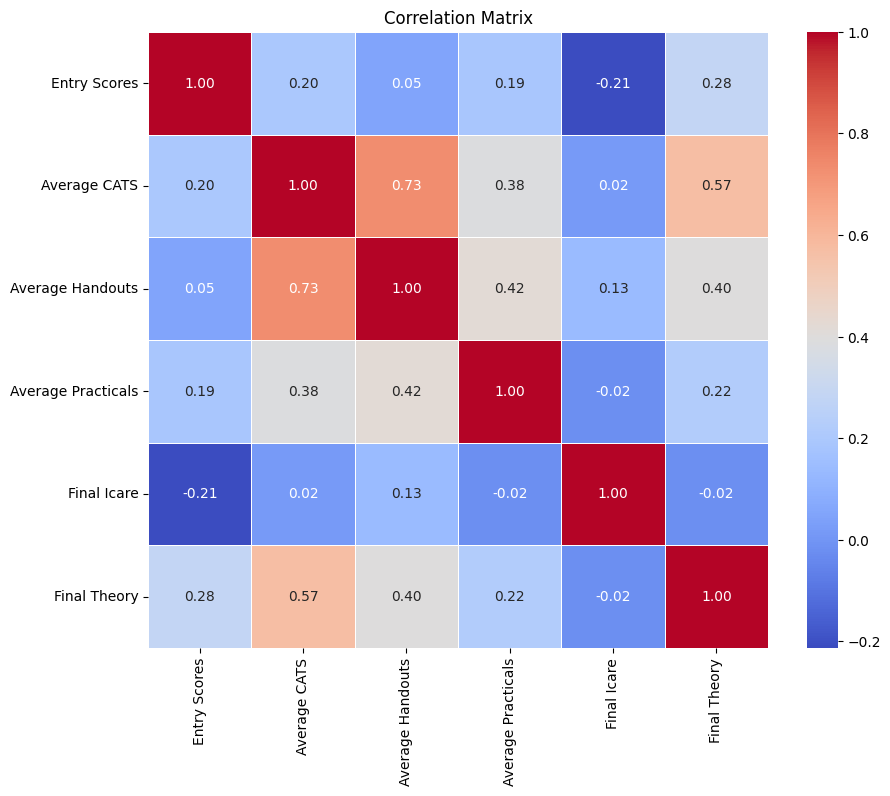

                    Entry Scores  Average CATS  Average Handouts  \
Entry Scores            1.000000      0.197265          0.051732   
Average CATS            0.197265      1.000000          0.731102   
Average Handouts        0.051732      0.731102          1.000000   
Average Practicals      0.187954      0.384718          0.420519   
Final Icare            -0.212741      0.016558          0.134260   
Final Theory            0.283549      0.569336          0.397174   

                    Average Practicals  Final Icare  Final Theory  
Entry Scores                  0.187954    -0.212741      0.283549  
Average CATS                  0.384718     0.016558      0.569336  
Average Handouts              0.420519     0.134260      0.397174  
Average Practicals            1.000000    -0.020373      0.219834  
Final Icare                  -0.020373     1.000000     -0.019563  
Final Theory                  0.219834    -0.019563      1.000000  


In [ ]:
# Select the relevant columns for correlation analysis
selected_cols = ['HighSchool Grade', 'Entry Scores', 'Average CATS', 'Average Handouts',
                 'Average Practicals', 'Final Icare', 'Final Theory']
correlation_data = data[selected_cols]

# Convert 'HighSchool Grade' to a numerical representation if it contains non-numeric values
# Assuming 'HighSchool Grade' has letter grades, we'll map them to numerical values
grade_mapping = {'A': 11, 'B+': 10, 'B': 9, 'B-': 8, 'C+': 7, 'C': 6, 'C-': 5, 'D+': 4, 'D': 3, 'D-': 2,'E': 1, 'C': 0}

# Mapping for letter grades
correlation_data.loc[:, 'HighSchool Grade'] = correlation_data['HighSchool Grade'].map(grade_mapping)

# Now, proceed with correlation calculation
correlation_matrix = correlation_data.corr(numeric_only=True)  # Add numeric_only for pandas >= 2.0

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix
print(correlation_matrix)

**Entry Scores**

*Entry Scores & Final Theory (0.283):*

A positive but weak correlation. Students with higher entry scores tend to perform slightly better in final theory exams, but the relationship is not very strong.

*Entry Scores & Average CATs (0.197):*

A weak positive correlation. Entry scores have a small impact on CAT (Continuous Assessment Test) performance.

*Entry Scores & Final Icare (-0.213)*:

A weak negative correlation. Higher entry scores are slightly associated with lower final Icare scores, suggesting a potential disconnect between theoretical entry performance and practical caregiving scores.

**Average CATs**

*Average CATs & Final Theory (0.569):*

A moderate positive correlation. Students who perform well in CATs tend to perform better in the final theory, showing consistency in theoretical knowledge assessment.

*Average CATs & Average Handouts (0.731):*

A strong positive correlation. Students who perform well in CATs also do well in handout-related assessments, indicating these metrics may assess similar academic competencies.

*Average CATs & Final Icare (0.017):*

Essentially no correlation. Performance in CATs does not predict performance in Final Icare, emphasizing the practical nature of Icare compared to CATs.

**Average Handouts**

*Average Handouts & Final Theory (0.397):*

A moderate positive correlation. Higher handout scores are associated with better performance in final theory exams, suggesting handouts might reinforce theoretical knowledge.

*Average Handouts & Final Icare (0.134):*

A weak positive correlation. There’s a slight relationship between handout performance and practical caregiving skills, but it’s not significant.
**Average Practicals**

*Average Practicals & Final Icare (-0.020):*

No significant correlation. Practical scores don’t predict Final Icare performance, suggesting a distinction between routine practicals and the final caregiving evaluation.

*Average Practicals & Final Theory (0.220):*
A weak positive correlation. Students who perform well in practicals also tend to do slightly better in final theory exams.

**Highest VS Lowest Entry Scores**

In [ ]:
# Group data by trainer and calculate the average entry score for each trainer
trainer_entry_scores = data.groupby('Trainer')['Entry Scores'].mean()

# Find the trainer with the highest average entry score
highest_entry_score_trainer = trainer_entry_scores.idxmax()
highest_entry_score = trainer_entry_scores.max()

# Find the trainer with the lowest average entry score
lowest_entry_score_trainer = trainer_entry_scores.idxmin()
lowest_entry_score = trainer_entry_scores.min()

# Print the results
print(f"Trainer with the highest average entry score: {highest_entry_score_trainer} ({highest_entry_score:.2f})")
print(f"Trainer with the lowest average entry score: {lowest_entry_score_trainer} ({lowest_entry_score:.2f})")

Trainer with the highest average entry score: Hussein Rumba (93.00)
Trainer with the lowest average entry score: Hellen Bittok / Emmaculate Kosgei (75.00)


**Highest and Lowest Correlation between Entry Scores and Final Icare Scores**

In [ ]:
# Group data by trainer and calculate the correlation between entry score and final Icare for each trainer
trainer_correlations = data.groupby('Trainer')[['Entry Scores', 'Final Icare']].corr().unstack()

# Extract the correlation coefficients
trainer_correlations = trainer_correlations['Entry Scores']['Final Icare']

# Find the trainer with the highest correlation
highest_correlation_trainer = trainer_correlations.idxmax()
highest_correlation = trainer_correlations.max()

# Find the trainer with the lowest correlation
lowest_correlation_trainer = trainer_correlations.idxmin()
lowest_correlation = trainer_correlations.min()

# Print the results
print(f"Trainer with the highest correlation between entry score and final Icare: {highest_correlation_trainer} ({highest_correlation:.2f})")
print(f"Trainer with the lowest correlation between entry score and final Icare: {lowest_correlation_trainer} ({lowest_correlation:.2f})")

Trainer with the highest correlation between entry score and final Icare: Hussein Rumba (1.00)
Trainer with the lowest correlation between entry score and final Icare: Molly (-0.87)


**Highest and Lowest Correlation between Average CATS and Final Icare Scores**

In [ ]:
# Group data by trainer and calculate the correlation between Average CATS and final Icare for each trainer
trainer_correlations = data.groupby('Trainer')[['Average CATS', 'Final Icare']].corr().unstack()

# Extract the correlation coefficients
trainer_correlations = trainer_correlations['Average CATS']['Final Icare']

# Find the trainer with the highest correlation
highest_correlation_trainer = trainer_correlations.idxmax()
highest_correlation = trainer_correlations.max()

# Find the trainer with the lowest correlation
lowest_correlation_trainer = trainer_correlations.idxmin()
lowest_correlation = trainer_correlations.min()

# Print the results
print(f"Trainer with the highest correlation between Average CATS and final Icare: {highest_correlation_trainer} ({highest_correlation:.2f})")
print(f"Trainer with the lowest correlation between Average CATS and final Icare: {lowest_correlation_trainer} ({lowest_correlation:.2f})")

Trainer with the highest correlation between Average CATS and final Icare: Hussein Rumba (1.00)
Trainer with the lowest correlation between Average CATS and final Icare: Molly (-0.90)


**Highest and Lowest Correlation between Average Handouts and Final Icare Scores**

In [ ]:
# Group data by trainer and calculate the correlation between Average Handouts and final Icare for each trainer
trainer_correlations = data.groupby('Trainer')[['Average Handouts', 'Final Icare']].corr().unstack()

# Extract the correlation coefficients
trainer_correlations = trainer_correlations['Average Handouts']['Final Icare']

# Find the trainer with the highest correlation
highest_correlation_trainer = trainer_correlations.idxmax()
highest_correlation = trainer_correlations.max()

# Find the trainer with the lowest correlation
lowest_correlation_trainer = trainer_correlations.idxmin()
lowest_correlation = trainer_correlations.min()

# Print the results
print(f"Trainer with the highest correlation between Average Handouts and final Icare: {highest_correlation_trainer} ({highest_correlation:.2f})")
print(f"Trainer with the lowest correlation between Average Handouts and final Icare: {lowest_correlation_trainer} ({lowest_correlation:.2f})")

Trainer with the highest correlation between Average Handouts and final Icare: Hussein Rumba (1.00)
Trainer with the lowest correlation between Average Handouts and final Icare: Molly (-0.80)


**Highest and Lowest Correlation between Average Practicals and Final Icare**

In [ ]:
# Group data by trainer and calculate the correlation between Average Practicals and final Icare for each trainer
trainer_practical_icare_corr = data.groupby('Trainer')[['Average Practicals', 'Final Icare']].corr().unstack()
trainer_practical_icare_corr = trainer_practical_icare_corr['Average Practicals']['Final Icare']

# Find the trainer with the highest correlation between Average Practicals and Final Icare
highest_practical_icare_corr_trainer = trainer_practical_icare_corr.idxmax()
highest_practical_icare_corr = trainer_practical_icare_corr.max()

# Find the trainer with the lowest correlation between Average Handouts and Final Icare
trainer_handouts_icare_corr = data.groupby('Trainer')[['Average Handouts', 'Final Icare']].corr().unstack()
trainer_handouts_icare_corr = trainer_handouts_icare_corr['Average Handouts']['Final Icare']
lowest_handouts_icare_corr_trainer = trainer_handouts_icare_corr.idxmin()
lowest_handouts_icare_corr = trainer_handouts_icare_corr.min()


print(f"Trainer with the highest correlation between Average Practicals and Final Icare: {highest_practical_icare_corr_trainer} ({highest_practical_icare_corr:.2f})")
print(f"Trainer with the lowest correlation between Average Handouts and Final Icare: {lowest_handouts_icare_corr_trainer} ({lowest_handouts_icare_corr:.2f})")

Trainer with the highest correlation between Average Practicals and Final Icare: Emmaculate Kosgei (0.79)
Trainer with the lowest correlation between Average Handouts and Final Icare: Molly (-0.80)


**Highest and Lowest Mean Final Icare Scores by Trainers**

In [ ]:
# Group data by trainer and calculate the mean Final Icare score
trainer_final_icare_mean = data.groupby('Trainer')['Final Icare'].mean()

# Find the trainer with the highest mean Final Icare score
highest_final_icare_trainer = trainer_final_icare_mean.idxmax()
highest_final_icare_mean = trainer_final_icare_mean.max()

# Find the trainer with the lowest mean Final Icare score
lowest_final_icare_trainer = trainer_final_icare_mean.idxmin()
lowest_final_icare_mean = trainer_final_icare_mean.min()

# Print the results
print(f"Trainer with the highest mean Final Icare score: {highest_final_icare_trainer} ({highest_final_icare_mean:.2f})")
print(f"Trainer with the lowest mean Final Icare score: {lowest_final_icare_trainer} ({lowest_final_icare_mean:.2f})")

Trainer with the highest mean Final Icare score: Emmaculate Kosgei (81.00)
Trainer with the lowest mean Final Icare score: Nicholas Mobisa (70.18)


**Highest and Lowest Mean Final Icare Scores by Hospital Internship**

In [ ]:
# Highest and Lowest Mean Final Icare Scores by Hospital Internship
trainer_final_icare_mean = data.groupby('Hospital Internship')['Final Icare'].mean()

# Find the internship with the highest mean Final Icare score
highest_final_icare_internship = trainer_final_icare_mean.idxmax()
highest_final_icare_mean = trainer_final_icare_mean.max()

# Find the internship with the lowest mean Final Icare score
lowest_final_icare_internship = trainer_final_icare_mean.idxmin()
lowest_final_icare_mean = trainer_final_icare_mean.min()

# Print the results
print(f"Internship with the highest mean Final Icare score: {highest_final_icare_internship} ({highest_final_icare_mean:.2f})")
print(f"Internship with the lowest mean Final Icare score: {lowest_final_icare_internship} ({lowest_final_icare_mean:.2f})")

Internship with the highest mean Final Icare score: Jesse Kay Hospital (88.00)
Internship with the lowest mean Final Icare score: Oak Tree Hospital (67.00)


## **3. Data Visualization**

**Bar Chart on Final Icare Scores and Trainers**

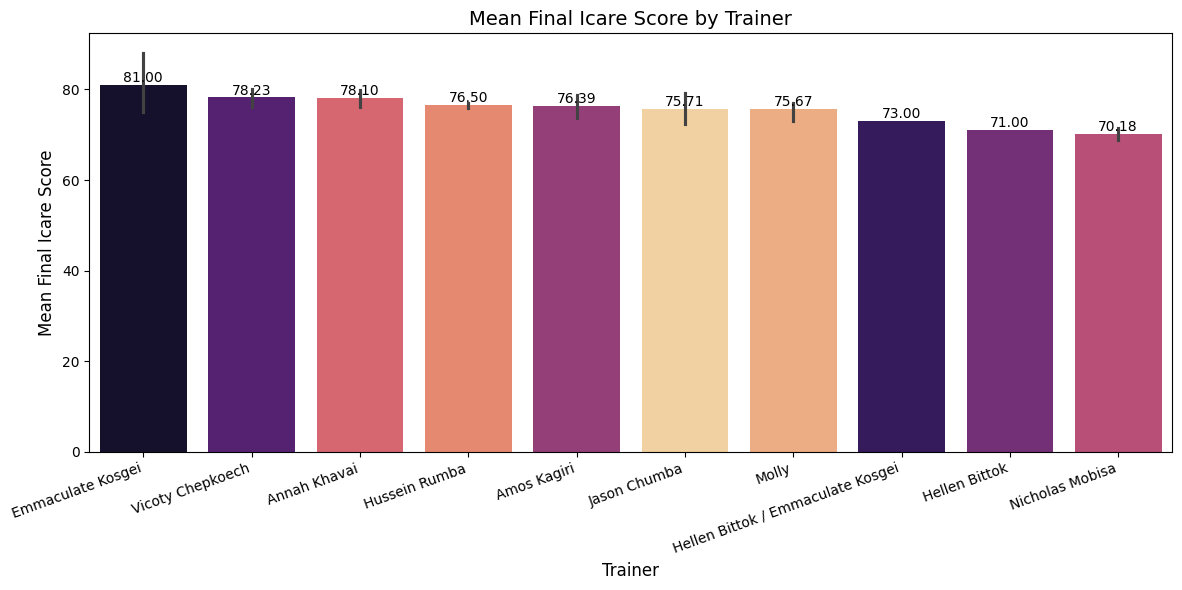

In [ ]:
plt.figure(figsize=(12, 6))

# Use `hue` as `x` and set legend=False
ax = sns.barplot(
    x='Trainer',
    y='Final Icare',
    data=data,
    order=data.groupby('Trainer')['Final Icare'].mean().sort_values(ascending=False).index,
    hue='Trainer',
    dodge=False,
    palette='magma'
)

# Customize labels and title
plt.xlabel("Trainer", fontsize=12)
plt.ylabel("Mean Final Icare Score", fontsize=12)
plt.title("Mean Final Icare Score by Trainer", fontsize=14)
plt.xticks(rotation=20, ha='right', fontsize=10)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format values to 2 decimal points
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()

**Icare Score by Hospital**

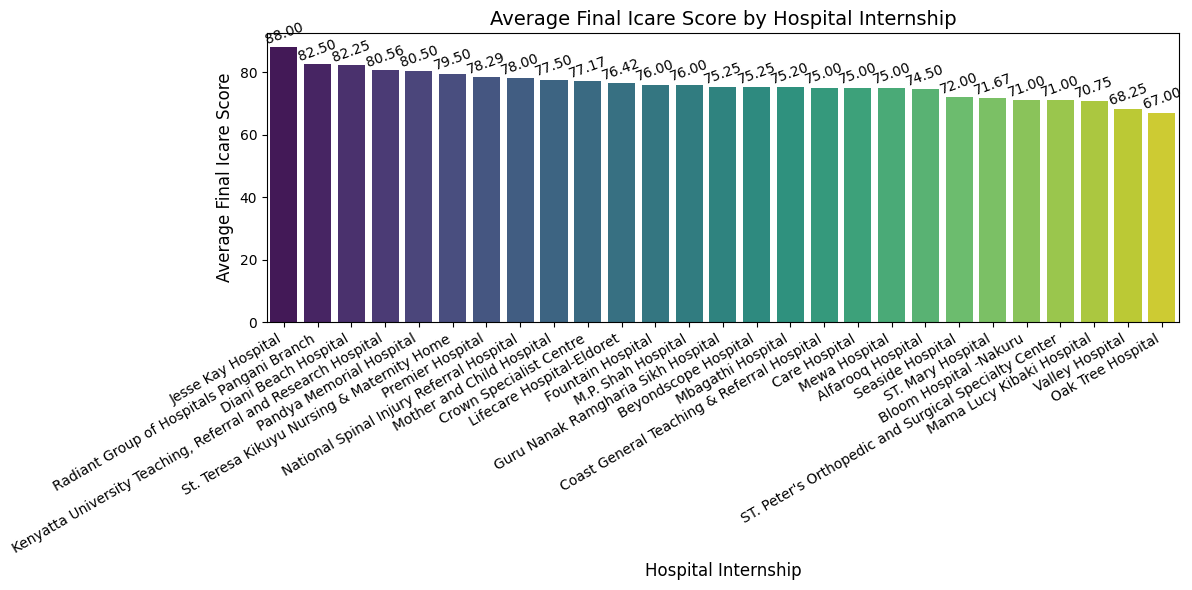

In [ ]:
plt.figure(figsize=(12, 6))

# Calculate the average Final Icare score for each hospital internship
average_icare_by_internship = data.groupby('Hospital Internship')['Final Icare'].mean().sort_values(ascending=False)

# Define a colormap (e.g., using "viridis" or any other colormap)
colors = sns.color_palette("viridis", len(average_icare_by_internship))

# Create the bar plot with a color palette
ax = sns.barplot(
    x=average_icare_by_internship.index,
    y=average_icare_by_internship.values,
    hue=average_icare_by_internship.index,  # Assign the x variable to 'hue' for proper coloring
    palette=colors,  # Apply the colormap
    legend=False
)

# Add data labels with rotation
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        rotation=20,  # Rotate the annotations to improve clarity
        xytext=(0, 10),
        textcoords='offset points'
    )

# Customize labels and title
plt.xlabel("Hospital Internship", fontsize=12)
plt.ylabel("Average Final Icare Score", fontsize=12)
plt.title("Average Final Icare Score by Hospital Internship", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha='right', fontsize=10)

# Ensure the layout fits well
plt.tight_layout()

# Display the plot
plt.show()



**Average Scores across Key Metrics**

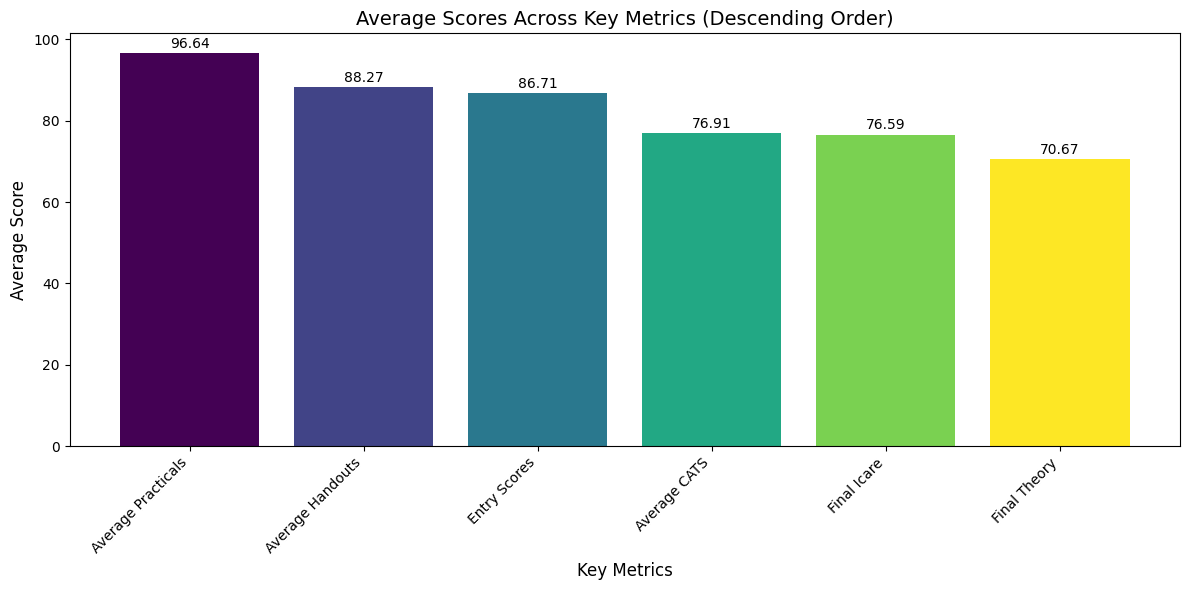

In [ ]:
# Calculate the average scores for each metric
average_scores = data[['Entry Scores', 'Average CATS', 'Average Handouts', 'Average Practicals', 'Final Icare', 'Final Theory']].mean()

# Sort the average scores in descending order
average_scores_sorted = average_scores.sort_values(ascending=False)

# Create the colorful bar graph
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_scores_sorted)))  # Use a colormap for variety
bars = plt.bar(average_scores_sorted.index, average_scores_sorted.values, color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel("Key Metrics", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.title("Average Scores Across Key Metrics (Descending Order)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Final Icare Score Distribution by Highschool Grade (Violin Plot)**

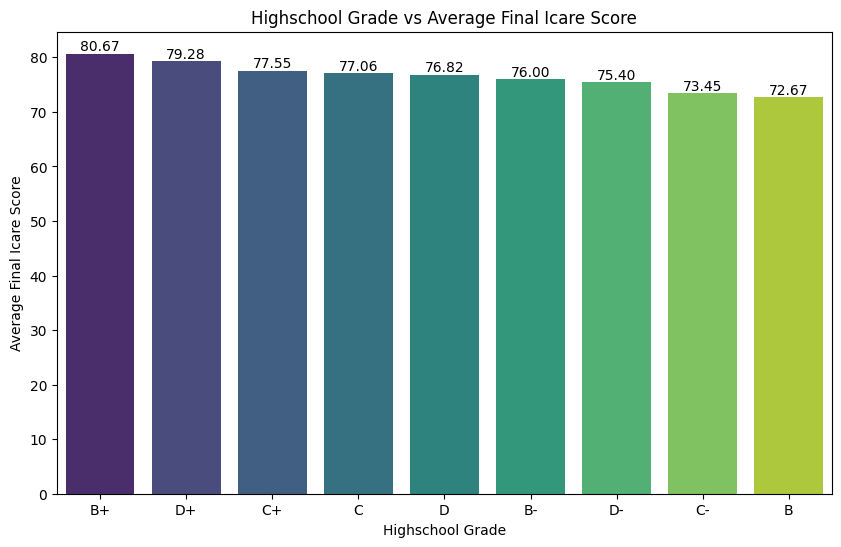

In [ ]:
# Calculate the average Final Icare score for each Highschool Grade
average_icare_by_grade = data.groupby('HighSchool Grade')['Final Icare'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

# Create the bar plot with sorted order and a color palette
ax = sns.barplot(
    x=average_icare_by_grade.index,
    y=average_icare_by_grade.values,
    hue=average_icare_by_grade.index,  # Assign the x variable to 'hue' for proper coloring
    palette='viridis',  # Apply color palette
    legend=False
)

plt.title('Highschool Grade vs Average Final Icare Score')
plt.xlabel('Highschool Grade')
plt.ylabel('Average Final Icare Score')

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()

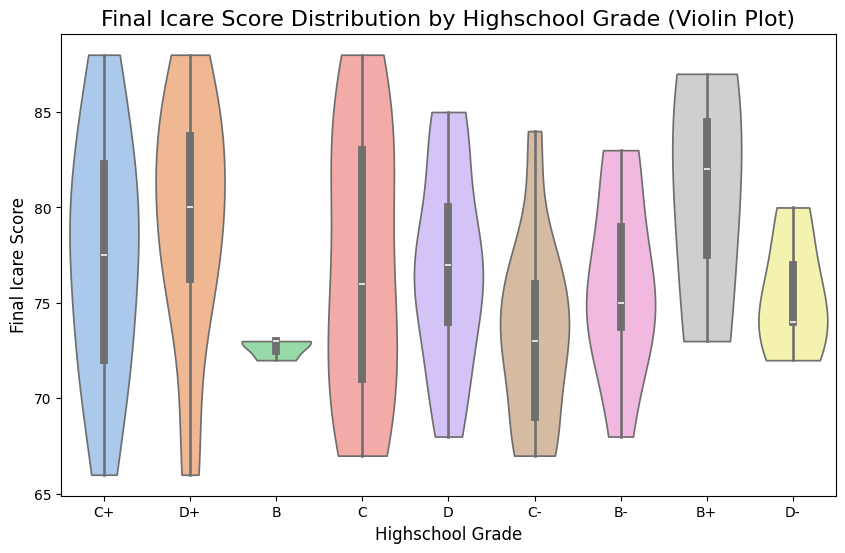

In [ ]:
plt.figure(figsize=(10, 6))

# Violin plot with a pastel color palette
sns.violinplot(
    x='HighSchool Grade',
    y='Final Icare',
    data=data,
    hue='HighSchool Grade',  # Set hue to 'HighSchool Grade'
    palette='pastel',  # Palette is now used with hue
    cut=0  # Avoid extending the plot beyond observed data
)

# Customize plot title and axes labels
plt.title('Final Icare Score Distribution by Highschool Grade (Violin Plot)', fontsize=16)
plt.xlabel('Highschool Grade', fontsize=12)
plt.ylabel('Final Icare Score', fontsize=12)

# Display the plot
plt.show()



**Observations from the Plot:**

*C+, D+, and C Grades:*

These grades have a wide spread of scores, but the scores are mostly concentrated between 75 and 85. The distributions for C+ and D+ are symmetric, indicating consistent performance around the median.

*B Grade:*

The B grade has a smaller violin shape, indicating less variation in scores.
It also has the highest concentration of scores tightly centered around a specific value, say 73.

*D-, B-, and B+ Grades:*

These grades show a relatively narrow distribution of scores.
The density is uneven, with most scores clustering near the middle and less spread in the tails.

*Overall Score Trends:*

Scores across all grades generally range from 65 to 85.
Higher grades (e.g., B+) tend to have higher median scores compared to lower grades (e.g., D-).

**Final Icare Score Distribution by Hospital Internship**

In [ ]:
import plotly.express as px

# Create the interactive box plot with color
fig = px.box(data,
             x='Hospital Internship',
             y='Final Icare',
             title='Final Icare Score Distribution by Hospital Internship',
             color='Hospital Internship')  # Add color based on 'Hospital Internship'

# Customize the plot (optional)
fig.update_layout(
    xaxis_title='Hospital Internship',
    yaxis_title='Final Icare Score',
    boxmode='group'  # To group boxes for better visibility (optional)
)

# Show the plot
fig.show()
